In [1]:
"""
Importing Libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_multilabel_classification

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
"""
Importing the models
"""
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
pwd

'/Users/shankar'

In [4]:
"""
Reading the column data from the respective .csv files that contains the Text and respective label.
This model works on all kinds of Text data that was labeled properly according to the text. 
We just need to change the name of the file that was given as an input.
"""
df = pd.read_csv("/Users/shankar/Data/Project/BBC News Train.csv")  #BBC News Train #Huff Post
df = df[['Text','Category']]
df

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
1485,double eviction from big brother model caprice...,entertainment
1486,dj double act revamp chart show dj duo jk and ...,entertainment
1487,weak dollar hits reuters revenues at media gro...,business
1488,apple ipod family expands market apple has exp...,tech


In [5]:
"""
Displaying the labels w.r.t the Text and passing it as an input to 
1. Generate the list to visualize the category count
2. Generate the dictionaries to map 
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
df['Category']

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [6]:
"""
Displaying the categories w.r.t their count
"""
df['category_id'] = df['Category'].factorize()[0]
category_list = df.groupby('Category').category_id.count()
category_list

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

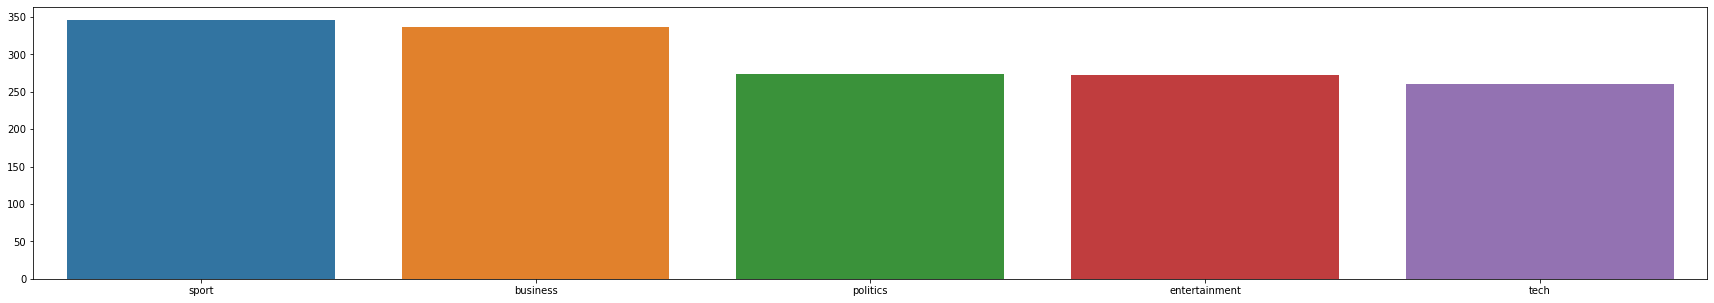

In [7]:
"""
Visualizing the label count
"""
category = df['Category'].value_counts()
plt.figure(figsize=(30, 5))
sns.barplot(category.index, category.values);

In [8]:
"""
Using term frequency and inverse document frequency to generate the features w.r.t the stopwords present in the text.
"""
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')

In [9]:
"""
Generating the features
"""
features = tfidf.fit_transform(df.Text).toarray()
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03250994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03842857, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
"""
Generating the labels for the respective text
"""
labels = df.category_id
labels

0       0
1       0
2       0
3       1
4       0
       ..
1485    4
1486    4
1487    0
1488    1
1489    1
Name: category_id, Length: 1490, dtype: int64

In [11]:
"""
Generating a list of available categories to pass this an input to generate dictionary
"""
list = df['Category'].values
list

array(['business', 'business', 'business', ..., 'business', 'tech',
       'tech'], dtype=object)

In [12]:
"""
Populating the 2 dictionaries
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
category_to_id_dict = {}
id_to_category_dict = {}

i=0
for word in list:
      if not word in category_to_id_dict:
            category_to_id_dict.update({word:i})
            id_to_category_dict.update({i:word})
            i=i+1
category_to_id_dict

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [13]:
id_to_category_dict

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [14]:
"""
Forming a list of model to pass as an input and check performance of each model w.r.t another
"""
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

In [15]:
"""
Calculating the cross-validation score for each model
"""
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=4)
    for i, accuracy in enumerate(accuracies):
        entries.append((model_name, i, accuracy))

In [16]:
"""
Populating the entries into a Data Frame
"""
entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'Cross-Validation-Set', 'accuracy'])
cv_df

,model_name,Cross-Validation-Set,accuracy
0,RandomForestClassifier,0,0.817694
1,RandomForestClassifier,1,0.809651
2,RandomForestClassifier,2,0.868280
3,RandomForestClassifier,3,0.868280
4,KNeighborsClassifier,0,0.941019
5,KNeighborsClassifier,1,0.943700
6,KNeighborsClassifier,2,0.962366
7,KNeighborsClassifier,3,0.962366
8,MultinomialNB,0,0.965147
9,MultinomialNB,1,0.959786


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

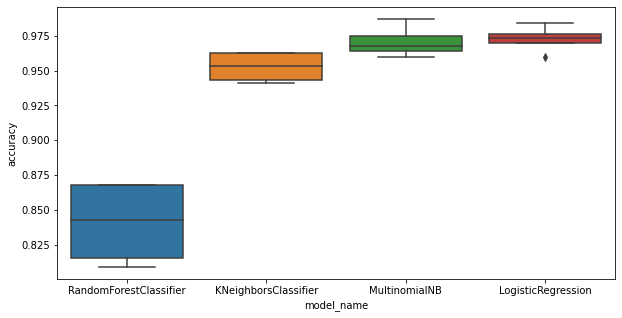

In [17]:
"""
Plotting the results of model (vs) cross_validation_accuracy
"""
plt.figure(figsize=(10, 5))
sns.boxplot('model_name', 'accuracy', data=cv_df)

In [18]:
"""
Modeling the RandomForestClassifier
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [19]:
"""
Spliting the input data into training and testing data
"""
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

In [20]:
"""
Modeling
"""
model = LogisticRegression()

In [21]:
"""
Fitting the model
"""
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
"""
predicting the testing data
"""
y_pred = model.predict(X_test)
y_pred

array([4, 2, 2, 1, 1, 0, 1, 4, 0, 1, 2, 4, 0, 3, 1, 1, 0, 3, 2, 0, 1, 4,
       3, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 2, 0, 4, 1, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 0, 3, 3, 0, 3, 2, 4, 4, 2, 0, 4, 1, 0, 4, 1, 1, 1,
       0, 1, 2, 2, 2, 3, 3, 3, 4, 4, 0, 2, 0, 0, 0, 3, 3, 3, 0, 4, 3, 0,
       0, 1, 4, 2, 2, 1, 0, 2, 1, 1, 4, 2, 4, 2, 4, 3, 1, 3, 2, 3, 0, 1,
       1, 0, 1, 4, 1, 0, 2, 0, 4, 0, 2, 3, 0, 2, 0, 0, 1, 1, 2, 4, 0, 3,
       4, 3, 0, 2, 0, 4, 0, 4, 0, 4, 1, 3, 4, 2, 0, 1, 2])

In [23]:
"""
Evaluating the performance metrics of the model
"""
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9932885906040269

In [24]:
cm_array = confusion_matrix(y_test, y_pred)
cm_array

array([[41,  1,  0,  0,  0],
       [ 0, 29,  0,  0,  0],
       [ 0,  0, 28,  0,  0],
       [ 0,  0,  0, 26,  0],
       [ 0,  0,  0,  0, 24]])

<AxesSubplot:>

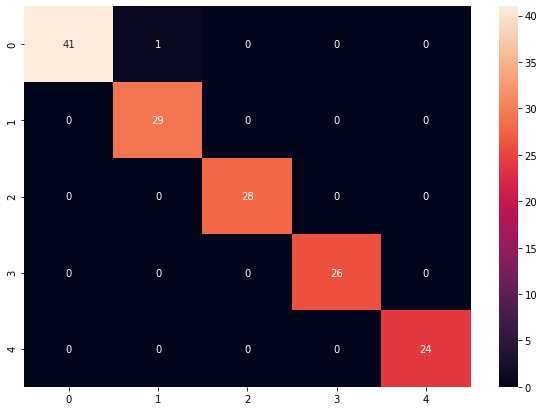

In [25]:
df_cm = pd.DataFrame(cm_array, index = range(len(category_to_id_dict)),
                  columns = range(len(category_to_id_dict)))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [26]:
precision_metric = precision_score(y_test, y_pred, average = "macro")
precision_metric

0.9933333333333334

In [27]:
recall_metric = recall_score(y_test, y_pred, average = "macro")
recall_metric

0.9952380952380953

In [28]:
f1_metric = f1_score(y_test, y_pred, average = "macro")
f1_metric

0.9942005309373085

In [29]:
"""
Selecting a block of text to predict it's category
"""
text = df.at[800,"Text"]
text

'double win for sea inside spanish movie the sea inside has been named best picture and star javier bardem best actor at the bangkok international film festival.  based on the true story of a paralysed man s battle to end his life  the sea inside was best foreign language film at the 2005 golden globe awards. annette bening and ana geislerova shared the best actress award at the bangkok festival. this year s event was scaled down following the asian tsunami disaster.  falling down and the phantom of the opera director joel schumacher won a lifetime achievement award while hong kong director wong kar-wai was honoured for promoting asian cinema.  it s a great honour  i want to share this honour with my thai colleagues   wong said. french writer christophe barratie and korean writer park chan-chook shared the best screenplay award for les choristes and old boy respectively. now in its third year  the bangkok international film festival is donating profits from ticket sales to the tsunami 

In [30]:
"""
Generating the features
"""
test_features = tfidf.transform([text])

In [31]:
"""
Predicting the label
"""
prediction = model.predict(test_features)

In [32]:
"""
Printing the label
"""
for i in range(len(prediction)):
    print(id_to_category_dict[prediction[i]])

entertainment


In [33]:
import joblib

In [34]:
joblib.dump(model,'Classification_joblib')

['Classification_joblib']